In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install statsmodels
!pip install matplotlib
!pip install feature-engine
!pip install scikit-learn
!pip install xgboost





[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import feature_engine
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from feature_engine.imputation import MeanMedianImputer




### PCA (Principal Component Analysis)
#### Intends to explain which variables explain the most variance in your data
#### Also referred as "Dimensionality reduction"

In [12]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df = df.sample(frac=0.6, random_state=101)
df.iloc[:10,4] = np.NaN
print(X.shape)
df.head()

(341, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
107,12.36,18.54,79.01,466.7,NaN,0.06815,0.02643,0.01921,0.1602,0.06066,...,27.49,85.56,544.1,0.11840,0.19630,0.19370,0.08442,0.2983,0.07185,1
437,14.04,15.98,89.78,611.2,NaN,0.05895,0.03534,0.02944,0.1714,0.05898,...,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234,1
195,12.91,16.33,82.53,516.4,NaN,0.05366,0.03873,0.02377,0.1829,0.05667,...,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949,1
141,16.11,18.05,105.10,813.0,NaN,0.11370,0.09447,0.05943,0.1861,0.06248,...,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158,0
319,12.43,17.00,78.60,477.3,NaN,0.03454,0.01342,0.01699,0.1472,0.05561,...,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932,1


In [13]:
df_target = df[['target']]
X = df.drop(['target'], axis=1)
print(X.shape)
X.head(3)

(341, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
107,12.36,18.54,79.01,466.7,NaN,0.06815,0.02643,0.01921,0.1602,0.06066,...,13.29,27.49,85.56,544.1,0.1184,0.1963,0.1937,0.08442,0.2983,0.07185
437,14.04,15.98,89.78,611.2,NaN,0.05895,0.03534,0.02944,0.1714,0.05898,...,15.66,21.58,101.20,750.0,0.1195,0.1252,0.1117,0.07453,0.2725,0.07234
195,12.91,16.33,82.53,516.4,NaN,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.1097,0.1506,0.1764,0.08235,0.3024,0.06949


In [16]:
def PipelineDataCleanFeatEng():
    pipeline_base = Pipeline([
        ('MeanMedianImputer', MeanMedianImputer(imputation_method='median')),

        ("feature_scaling", StandardScaler()),
        
    ])
    return pipeline_base

PipelineDataCleanFeatEng()    

Pipeline(steps=[('MeanMedianImputer', MeanMedianImputer()),
                ('feature_scaling', StandardScaler())])

In [18]:
pipeline_pca = PipelineDataCleanFeatEng()
df_pca = pipeline_pca.fit_transform(X)
print(df_pca.shape, '\n', type(df_pca))

(341, 30) 
 <class 'numpy.ndarray'>


In [19]:
df_pca

array([[-0.56738473, -0.16536585, -0.59933184, ..., -0.50820136,
         0.1792575 , -0.63049085],
       [-0.07141397, -0.77390549, -0.13893309, ..., -0.66545513,
        -0.27508597, -0.60317217],
       [-0.40501335, -0.69070671, -0.44885797, ..., -0.54111494,
         0.25145937, -0.76206648],
       ...,
       [ 2.35825232,  0.10324735,  2.55506217, ...,  2.77647856,
         2.06707222,  0.82130135],
       [-0.88031867, -0.24856463, -0.81649299, ...,  0.08615112,
         0.75158939,  2.59478483],
       [ 0.34779941, -1.74614265,  0.40482476, ...,  1.0544782 ,
         0.58957544,  0.99469128]])

In [20]:
n_components = 30  # Set the number of components as all columns in the data

# Set up PCA object and fit it to the data
pca = PCA(n_components=n_components).fit(df_pca)

# Array with transformed PCA
X_PCA = pca.transform(df_pca)

# The PCA object has explained_variance_ratio_ attribute, which tells
# how much information (variance) each component has.
# We store that information in a DataFrame relating each component to its variance explanation.
ComponentsList = ["Component " + str(number) for number in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data=np.round(100 * pca.explained_variance_ratio_, 2),
    index=ComponentsList,
    columns=['Explained Variance Ratio (%)']
)

# Prints how much of the dataset these components explain (naturally in this case will be 100%)
PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum()
print(f"* The {n_components} components explain {round(PercentageOfDataExplained, 2)}% of the data.\n")
print(dfExplVarRatio)

* The 30 components explain 100.0% of the data.

              Explained Variance Ratio (%)
Component 0                          43.68
Component 1                          18.48
Component 2                          10.31
Component 3                           6.72
Component 4                           5.88
Component 5                           3.86
Component 6                           2.44
Component 7                           1.63
Component 8                           1.31
Component 9                           1.05
Component 10                          0.96
Component 11                          0.84
Component 12                          0.73
Component 13                          0.42
Component 14                          0.34
Component 15                          0.26
Component 16                          0.23
Component 17                          0.22
Component 18                          0.14
Component 19                          0.11
Component 20                          0.09
Compo

In [21]:
n_components = 7  # Set the number of components as all columns in the data

# Set up PCA object and fit it to the data
pca = PCA(n_components=n_components).fit(df_pca)

# Array with transformed PCA
X_PCA = pca.transform(df_pca)

# The PCA object has explained_variance_ratio_ attribute, which tells
# how much information (variance) each component has.
# We store that information in a DataFrame relating each component to its variance explanation.
ComponentsList = ["Component " + str(number) for number in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data=np.round(100 * pca.explained_variance_ratio_, 2),
    index=ComponentsList,
    columns=['Explained Variance Ratio (%)']
)

# Prints how much of the dataset these components explain (naturally in this case will be 100%)
PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum()
print(f"* The {n_components} components explain {round(PercentageOfDataExplained, 2)}% of the data.\n")
print(dfExplVarRatio)

* The 7 components explain 91.37% of the data.

             Explained Variance Ratio (%)
Component 0                         43.68
Component 1                         18.48
Component 2                         10.31
Component 3                          6.72
Component 4                          5.88
Component 5                          3.86
Component 6                          2.44


In [22]:
X_PCA

array([[-3.19632096, -0.7882415 , -1.54280305, ...,  0.31482589,
         0.25021347,  0.14958942],
       [-2.15148256, -0.97430915,  0.45730527, ..., -0.43744131,
        -0.18081375, -0.0783528 ],
       [-2.81567468, -0.67506773, -0.47638179, ..., -0.0187848 ,
         0.84195774, -0.40380846],
       ...,
       [13.25075397,  0.68891084,  0.36451787, ..., -1.0003148 ,
         0.78704341,  0.10109186],
       [ 1.2548625 ,  4.93892792, -1.0380955 , ...,  1.71789741,
         1.0133776 ,  1.24697795],
       [ 2.83513614,  1.09372726, -2.33467669, ..., -0.15095285,
        -0.77420664, -0.15741655]])

<function matplotlib.pyplot.show(close=None, block=None)>

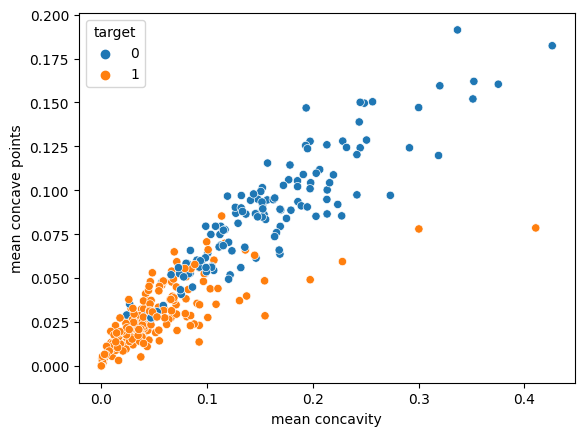

In [23]:
var1, var2 = 'mean concavity', 'mean concave points'
sns.scatterplot(x=X[var1], y=X[var2], hue=df_target['target'])
plt.xlabel(var1)
plt.ylabel(var2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

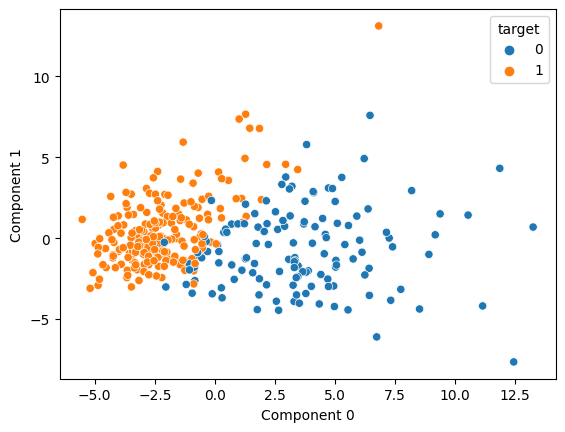

In [25]:
sns.scatterplot(x=X_PCA[:,0], y=X_PCA[:,1], hue=df_target['target'])
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.show

In [27]:
principal_components = pca.components_

components_df = pd.DataFrame(principal_components, columns=df.columns)


ValueError: Shape of passed values is (7, 30), indices imply (7, 31)